In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random, statistics
import numpy as np
from scipy import stats
from statsmodels.stats import weightstats, proportion, oneway
from statsmodels.stats.multicomp  import pairwise_tukeyhsd

## Descriptive statstics

In [2]:
random.seed(9)

x = [random.randint(1, 101) for _ in range(100)]
len(x)

100

In [3]:
print("Mean :", statistics.mean(x))
print("Median :", statistics.median(x))
print("Mode :", statistics.mode(x))

Mean : 46.17
Median : 44.0
Mode : 26


In [4]:
# dispersion 
print("Range :", max(x) - min(x))
print("Standard deviation for sample :", round(statistics.stdev(x),2))
print("Variance :", round(statistics.variance(x),2))
print("Quantiles :", statistics.quantiles(x))
print("IQR :", statistics.quantiles(x)[2] - statistics.quantiles(x)[0])

Range : 99
Standard deviation for sample : 31.21
Variance : 974.34
Quantiles : [18.0, 44.0, 75.0]
IQR : 57.0


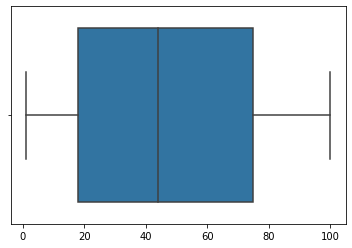

In [5]:
# boxplot
sns.boxplot(x=x)
plt.show()

## Probability Distributions

#### Binomial Distribution :
A **binomial experiment** has the following properties:
- The experiment consistsof n repeated trials.
- Each trial can result in just two possible outcomes. We call one of these outcomes a success and the other, a failure.
- The probability of success, denoted by p, is the same on every trail.
- The trials are independent;that is, the outcome on one trial does not affect the outcome on the other trials.
- The mean of distribution is n.p
- The variance is n.p.(1-p)
- The standard deviation is sqrt(n.p.(1-p))

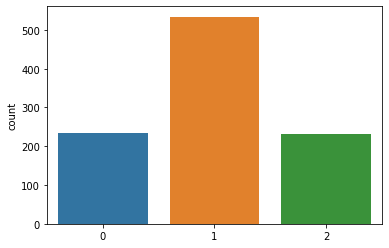

In [6]:
# binomial distribution
# two coins 1000 times
two_coins = np.random.binomial(2, 0.5, 1000)
sns.countplot(x=two_coins)
plt.show()

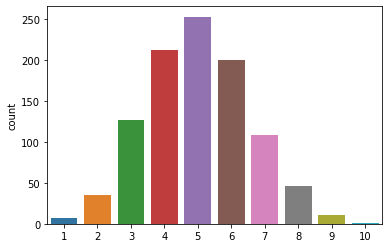

In [7]:
# ten coins 1000 times
ten_coins = np.random.binomial(10, 0.5, 1000)
sns.countplot(x=ten_coins)
plt.show()

In [8]:
# Flipping 10 coins
# probability of getting exact 5 heads 
print("Probability of getting exact 3 heads :", round(stats.binom.pmf(5, 10, 0.5),2))

# probability of getting atleast 3 heads
print("Probability of getting atleast 3 heads :", round(stats.binom.cdf(3, 10, 0.5),2))

# probability of getting atleast 4 heads
print("Probability of getting atleast 4 heads :", round(stats.binom.cdf(4, 10, 0.5),2))

# probability of getting 7 or more heads
print("Probability of getting 7 or more heads :", round(1 - stats.binom.cdf(6, 10, 0.5),2))

Probability of getting exact 3 heads : 0.25
Probability of getting atleast 3 heads : 0.17
Probability of getting atleast 4 heads : 0.38
Probability of getting 7 or more heads : 0.17


##### Example :
**A manufacturer has 12% defects rate in production. The buyer decides to test 20 random pieces and will accept the supplier if there are 2 or less defectives. What is the probability if getting accepted ?***

In [9]:
print(f"Probability of getting accepted is : {round(stats.binom.cdf(2, 20, 0.12), 2)}")

Probability of getting accepted is : 0.56


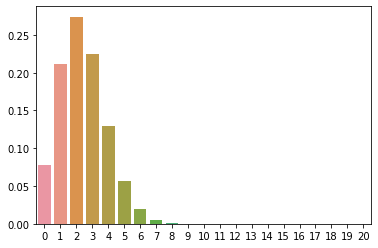

In [10]:
# probability mass function (pmf) plot
x_ax = np.arange(0,21)
y_ax = stats.binom.pmf(x_ax, 20, 0.12)

sns.barplot(x=x_ax, y=y_ax)
plt.show()

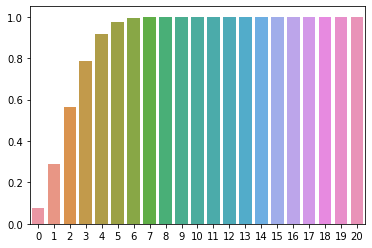

In [11]:
# cumulative distribution function (cdf) plot 
x_ax = np.arange(0,21)
y_ax = stats.binom.cdf(x_ax, 20, 0.12)

sns.barplot(x=x_ax, y=y_ax)
plt.show()

### Binomial vs Poisson Distribution
- Similarities:
    - Both are for discrete distribution
    - Both measure the number of successes
- Differences:
    - In Poisson distribution the possibilites of success are infinite.

- **A Poisson experiment** has the following properties:
    - The experiment results in outcomes that can be classified as successes or failures.
    - The average number of successes that occurs in a specified region is known.
    - Outcomes are random. Occurrence of one outcome does not influence the chance of another outcome of interest.
    - **The outcomes of interest are rare relative to the possible outcomes.**
        - Example : Road accidents, que at the counter

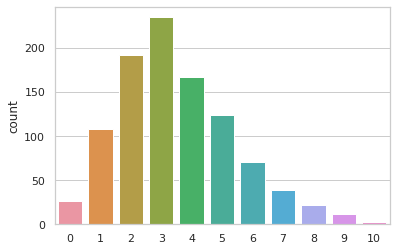

In [12]:
# poisson distribution

# Ex: on a booking counter on the average 3.6 people come every 10 min. on weekends.
# Below is the count distribution based on that for 1000 sample.
queue_size = np.random.poisson(3.6, 1000)

sns.set_theme(style='whitegrid')
sns.countplot(x=queue_size)
plt.show()

In [13]:
# probability of 7 people on queue in 10 minutes where 3.6 people come every 10 min.
print("Probability of 7 people on queue in 10 minutes :", round(stats.poisson.pmf(7, 3.6),3))

Probability of 7 people on queue in 10 minutes : 0.042


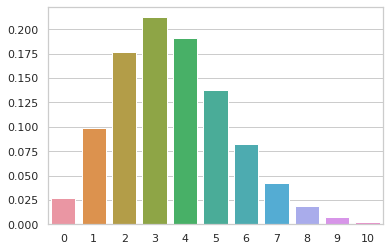

In [14]:
# probability mass function (pmf) plot
x_ax = np.arange(0,11)
y_ax = stats.poisson.pmf(x_ax, 3.6)

sns.barplot(x=x_ax, y=y_ax)
plt.show()

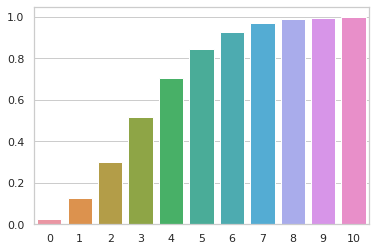

In [15]:
# cumulative distribution function (cdf) plot 
x_ax = np.arange(0,11)
y_ax = stats.poisson.cdf(x_ax, 3.6)

sns.barplot(x=x_ax, y=y_ax)
plt.show()

### Normal distribution:
- Symmetrically distributed.
- Long Tails / Bell Shaped.
- Mean/ Mode and Median are same.
- About 68% of the area under the curve falls within **1 standard deviation** of the mean.
- About 95% of the area under the curve falls within **2 standard deviation** of the mean.
- About 99.7% of the area under the curve falls within **3 standard deviation** of the mean.
- Total area under the normal curve = 1.
- The probability of any particular value is 0.
- The probability that X is greater than or less than a value = area under the normal curve in that direction.

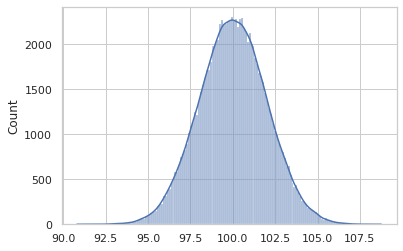

In [16]:
# Plot of 100000 samples where mean is 100 and standard deviation is 2.
a = np.random.normal(100, 2, 100000)
sns.histplot(x=a, kde=True)
plt.show()

##### Ex: 
**Perfume bottles are filled with average volume of 150 cc and the standard deviation of 2 cc. What percent of bottles will have a volume greater than 153 cc?**

In [17]:
print(f"{round(stats.norm.sf(153, 150 ,2)*100, 2)} % of bottles will have a volume greater than 153 cc.")

6.68 % of bottles will have a volume greater than 153 cc.


##### Example: 
**Perfume bottles are filled with average volume of 150 cc and the standard deviation of 2 cc. What percent of bottles will have a volume between 148 and 152 cc?**

In [18]:
print(f"{round((stats.norm.sf(148, 150 ,2) - stats.norm.sf(152, 150, 2))*100, 2)} % of bottles will have a volume between 148 and 152 cc.")

68.27 % of bottles will have a volume between 148 and 152 cc.


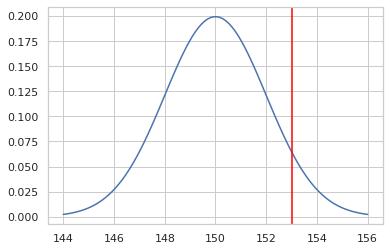

In [19]:
# Normal distribution plot
x_ax = np.linspace(144, 156, 100)
y_ax = stats.norm.pdf(x_ax, 150, 2)

sns.lineplot(x=x_ax, y=y_ax)
plt.axvline(153, color = 'red')
plt.show()

## Inferential Statistics and Hypothesis Testing

### Central limit theorem
- The Central Limit Theorem states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution. 
- An essential component of the Central Limit Theorem is that the **average of your sample means will be the population mean**.

<AxesSubplot:ylabel='Count'>

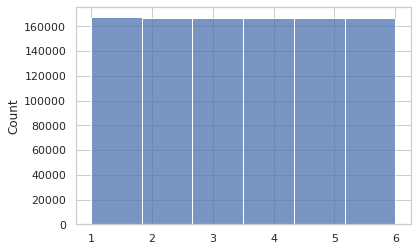

In [20]:
# rolling a dice 1000000 times
one_million_dice = np.random.randint(1, 7, 1000000)
sns.histplot(x= one_million_dice, bins=6)

In [21]:
# population mean 
print(f"Population mean of rolling a dice one million times is {round(np.mean(one_million_dice), 2)}")

# population standard deviation 
print(f"Population standard deviation of rolling a dice one million times is {round(np.std(one_million_dice), 2)}")

Population mean of rolling a dice one million times is 3.5
Population standard deviation of rolling a dice one million times is 1.71


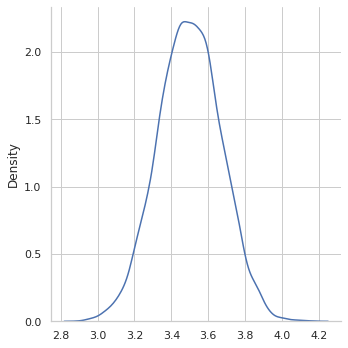

In [22]:
# creating a sample of 100
sample_100 = one_million_dice.reshape(100, 10000)
sample_means = np.mean(sample_100, axis = 0)

sns.displot(x= sample_means, kind='kde')

In [23]:
# Sample mean (should be equal to population mean)
print(f"Sample mean is {round(np.mean(sample_means), 2)}")

Sample mean is 3.5


In [24]:
# Sample standard deviation
print(f"Sample standard deviation using sample means is {round(np.std(sample_means), 2)}")

# Population standard deviation
population_std = np.std(one_million_dice)
print(f"Population standard deviation : {round(population_std, 2)}")

# No. of sample
sample_size = 100
print(f"Sample size : {sample_size}")

# Sample mean from population standard deviation:
sample_std = population_std/np.sqrt(sample_size)

print(f"Sample standard deviation using population standard deviation is {round(sample_std, 2)}")

Sample standard deviation using sample means is 0.17
Population standard deviation : 1.71
Sample size : 100
Sample standard deviation using population standard deviation is 0.17


### Hypothesis Testing
- A **statstical hypothesis** test is a method of statistical inference.
- Commonly use test include:
    - Compare sample statstic with the population parameter.
    - Compare two datasets

#### Steps in Hypothesis Testing:
1. State the Alternate Hypothesis.
2. State the Null Hypothesis.
3. Select a probability if error level (alpha level). Generally 0.05.
4. Calculate the test statistic (e.g t or z score).
5. Critical test statistic.
6. Interpret the results.

#### Hypothesis Testing - Errors :

|**Basis of Difference**|**Type I Error**|**Type II Error**|
|:--- |:--- |:--- |
|Occurrence|A type I error occurs when the null hypothesis is true but is rejected. In other words, if a true null hypothesis is incorrectly rejected, type I error occurs.|A type II error occurs when the null hypothesis is false but invalidly fails to be rejected. In other words, failure to reject a false null hypothesis results in type II error.|
|Comparison|A type I error also known as False positive.|A type II error also known as False negative. It is also known as false null hypothesis.|
|Designation|The probability that we will make a type I error is designated ‘α’ (alpha). Therefore, type I error is also known as alpha error|Probability that we will make a type II error is designated ‘β’ (beta). Therefore, type II error is also known as beta error.|
|Probability of committing error|Type I error equals to the level of significance (α).<br><br>‘α’ is the so-called p-value.|Type II error equals to the statistical power of a test.<br><br>The probability 1- ‘β’ is called the statistical power of the study.|
|Represents|Type I error represents ‘a false hit’.|Type II error represents ‘a miss’.|
|Nature|We may reject the null hypothesis when the null hypothesis is true is known as Type I error.|We may accept the null hypothesis, when in fact null hypothesis is not true is known as Type II error.|
|Importance|Type I errors are generally considered more serious.|Type II errors are given less preference.|
|Acceptance|It refers to non-acceptance of hypothesis, which ought to be accepted.|It refers to the acceptance of hypothesis, which ought to be rejected.|
|Consequence|The probability of Type I error reduces with lower values of (α) since the lower value makes it difficult to reject null hypothesis.|The probability of Type II error reduces with higher values of (α) since the higher value makes it easier to reject the null hypothesis.|


#### p Value :
- p value is the lowest value of alpha for which the null hypothesis can be rejected. (Probability that the null hypothesis is correct)

## One Sample tests

### One Sample z Test
##### Conditions for z Test
- Random Samples
- Each observation should be independent of other
    - Sampling with replacement
    - If sampling without replacement, the sample size should not be more than 10% of populatin
- Sampling distribution approximates Normal Distribution
    - Population is Normally distributed and the population standard deviation is known or 
    - Sample size >= 30

##### Example 1:
**A machine is producing perfume bottles with the long term average of 150cc and the standard deviation of 2 cc. Four bottles were picked and the average volume was found to be 153.8cc. Has the average volume changed from 150cc? Test with 95% confidence level.**

In [25]:
# Alternate Hypothesis: Mean volume != 150cc
# Null Hypothesis: Mean volume = 150cc
# Alpha = 1 - 0.95 = 0.05
# z calculated = (observed mean - population mean) / standard error 
# z = (x - µ) / (σ / √n)

z_cal = (153.8 - 150) / (2 / np.sqrt(4))
print("Z calucated is", round(z_cal, 2))

# left critical z value
z_critical_left = stats.norm.ppf(0.025)
print("Left critical Z is", round(z_critical_left,2))

# right critical z value
z_critical_right = stats.norm.isf(0.025)
print("Right critical Z is", round(z_critical_right,2))

if z_critical_left <= z_cal and z_cal <= z_critical_right:
    print("Failed to reject null hypothesis")
else:
    print("Reject null hypothesis")

Z calucated is 3.8
Left critical Z is -1.96
Right critical Z is 1.96
Reject null hypothesis


In [26]:
# using p value
p_value = 2 * stats.norm.sf(z_cal)

# significance check
if p_value >= 0.05:
    print("Failed to reject null hypothesis")
else:
    print("Reject null hypothesis")

Reject null hypothesis


##### Example 2:

In [27]:
df = pd.read_csv('./data/Machine1.csv')

In [28]:
df.head()

,Machine 1
0,152.63
1,152.94
2,151.29
3,153.44
4,148.58


In [29]:
df.describe()

,Machine 1
count,100.000000
mean,150.203100
std,2.018812
min,145.550000
25%,148.717500
50%,150.285000
75%,151.502500
max,154.550000


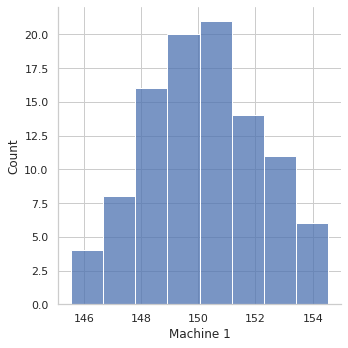

In [30]:
sns.displot(data=df, x='Machine 1')

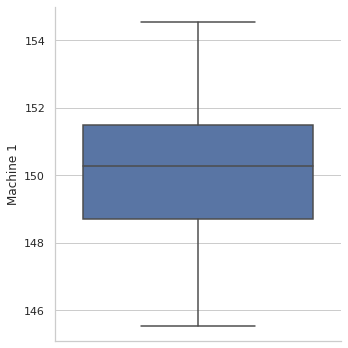

In [31]:
sns.catplot(data=df, y='Machine 1', kind='box')

In [32]:
# One sample z test :
# value(mean) : 150
# two sided test
z_cal, p_value = weightstats.ztest(x1 = df['Machine 1'], value = 150, alternative='two-sided')

print(f"Calculated z value is {round(z_cal, 2)}")
print(f"p value is {round(p_value, 2)}")

Calculated z value is 1.01
p value is 0.31


In [33]:
# One sample z test :
# value(mean) : 150
# one sided test(larger)
z_cal, p_value = weightstats.ztest(x1 = df['Machine 1'], value = 150, alternative='larger')

print(f"Calculated z value is {round(z_cal, 2)}")
print(f"p value is {round(p_value, 2)}")

Calculated z value is 1.01
p value is 0.16


### One Sample t Test
##### Conditions for t Test
- Random Samples
- Each observation should be independent of other
    - Sampling with replacement
    - If sampling without replacement, the sample size should not be more than 10% of populatin
- Sampling distribution approximates Normal Distribution
    - Population is Normally distributed and the population standard deviation is unknown and 
    - Sample size < 30

##### Example :
**Perfume bottle producing 150cc, 4 bottles are randomly picked and the average volume was found to be 151cc and sd of the sample bottles was 2 cc. Has mean volume changed? (95% confidence)**

In [34]:
# One sample t test :
# value(mean) : 150
# two sided test

# volume of 4 sample bottles
volume = pd.Series([148.5, 153.4, 150.9, 151.2])

result = stats.ttest_1samp(volume, 150)

print(f"Calculated t value is {round(result[0], 2)}")
print(f"p value is {round(result[1], 2)}")

Calculated t value is 1.0
p value is 0.39


**As p value is greater than 0.05 thus failed to reject the null hypothesis.**

### One Proportion Test
##### Conditions for One Proportion Test
- Random Samples
- Each observation should be independent of other
    - Sampling with replacement
    - If sampling without replacement, the sample size should not be more than 10% of populatin
- The data contains only two categories, such as pass/fail or yes/no
- For Normal approximation:
    - both np>=10 and n(1-p)>=10 (data should have at least 10 "successes" and at leasr 10 "failures") (it can be 5 also)

##### Example :
**Smoking rate in a town in past was 21%, 100 samples were picked and found 14 smokers. Has smoking habit changed?**

In [35]:
df = pd.read_csv("./data/Smokers.csv")
df.head()

,Name,Smokers
0,Person 1,No
1,Person 2,No
2,Person 3,No
3,Person 4,Yes
4,Person 5,No


In [36]:
df.groupby('Smokers').count()

,Name
Smokers,
No,86
Yes,14


In [37]:
p_0, p, n = 0.21, 0.14, 100
# np_0 = 0.21 * 100
# n(1 - p_0) = 0.79 * 100,
# sample size >= 10
# z = (p - p_0) / sqrt((p_0 * (1 - p_0)) / n)
# This method is based on approximation

z_cal = (p - p_0) / np.sqrt((p_0 * (1 - p_0)) / n)
print(f"Z calculated is {round(z_cal, 2)}")

# as alpha is 0.05 with two tailed test, so z critical will be -1.96 and 1.96
if z_cal >= -1.96 and z_cal <= 1.96:
    print("Failed to reject null hypothesis.")
else:
    print("Reject null hypothesis")

Z calculated is -1.72
Failed to reject null hypothesis.


In [38]:
result = stats.binomtest(14, 100, p=0.21)
print(result)
print(f"p value for above scenario is {round(result.pvalue, 2)}.")

BinomTestResult(k=14, n=100, alternative='two-sided', proportion_estimate=0.14, pvalue=0.10920815720825927)
p value for above scenario is 0.11.


In [39]:
# same scenario but aiternative hypothesis is smoking habit has decreased.
result = stats.binomtest(14, 100, p=0.21, alternative='less')
print(result)
print(f"p value for this scenario is {round(result.pvalue, 2)}.")

BinomTestResult(k=14, n=100, alternative='less', proportion_estimate=0.14, pvalue=0.05042460221552124)
p value for this scenario is 0.05.


### One Variance Test
##### Conditions for One Variance Test
- Random Samples
- Each observation should be independent of other
    - Sampling with replacement
    - If sampling without replacement, the sample size should not be more than 10% of populatin
- The data follows a **Normal Distribution**.

#### Variance Tests
- **Chi-square test**
    - For testing the population variance against a specified value.
    - testing goodness of fit of some probability distribution.
    - testing for independence of two attributes (Contingency Tables)
- **F-test**
    - for testing equality of two variances from different populations
    - for testing equality of several means with technique of ANOVA

##### Example :
**A sample of 51 bottles was selected. The standard deviation of these 51 bottles was 1.35cc. Has it increased from the established 2cc? (90% confidence level).**

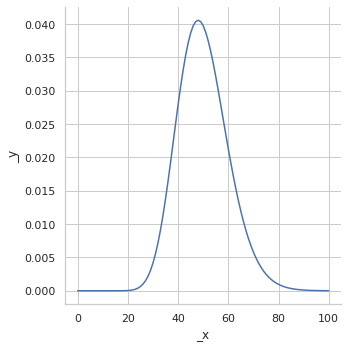

In [40]:
x_ax = np.linspace(0, 100 ,101)
y_ax = stats.chi2.pdf(x_ax, df=50)
sns.relplot(x=x_ax,y=y_ax, kind='line')

In [41]:
# chi_square_calculated = (n-1)s^2 / sigma^2
chi_sq_cal = (51-1)*(2.35**2) / (2**2)
print(f"Chi square calculated : {round(chi_sq_cal, 2)}")

# right side area in distribution is equal to 0.10
critical_value = stats.chi2.isf(0.10, 50)
print(f"Critical value : {round(critical_value, 2)}")

# significance check
if chi_sq_cal > critical_value:
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

Chi square calculated : 69.03
Critical value : 63.17
Reject null hypothesis


## Two Samples tests

### Two Sample Z test
##### Conditions for z Test
- Random Samples
- Each observation should be independent of other
    - Sampling with replacement
    - If sampling without replacement, the sample size should not be more than 10% of populatin
- Sampling distribution approximates Normal Distribution
    - Population is Normally distributed and the population standard deviation is known or 
    - Sample size >= 30

##### Example :
**From two machines 100 samples each were drawn. Is there difference in these two machines. Check at 95% confidence level.**

In [42]:
df = pd.read_csv("./data/Two+Machines.csv")
df.head()

,Volume,Machine
0,154.27,Machine 1
1,150.03,Machine 1
2,151.14,Machine 1
3,145.47,Machine 1
4,149.71,Machine 1


<AxesSubplot:xlabel='Machine', ylabel='Volume'>

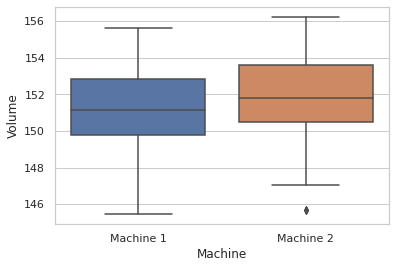

In [43]:
sns.boxplot(data=df, x='Machine', y='Volume')

In [44]:
# making different series for machine 1 and 2
machine_1 = df[df['Machine'] == 'Machine 1']['Volume']
machine_2 = df[df['Machine'] == 'Machine 2']['Volume']

In [45]:
# calculating p value
z_cal, p_value = weightstats.ztest(machine_1, machine_2)
print(f"Z calculated : {round(z_cal, 2)}")
print(f"p value : {round(p_value, 2)}")

Z calculated : -2.19
p value : 0.03


**As p value is less than 0.05 thus reject the null hypothesis.
So we can conclude these two machines are different.**

### Two Samples t Test
##### Conditions for t Test
- Random Samples
- Each observation should be independent of other
    - Sampling with replacement
    - If sampling without replacement, the sample size should not be more than 10% of populatin
- Sampling distribution approximates Normal Distribution
    - Population is Normally distributed and the population standard deviation is unknown and 
    - Sample size < 30
    
- **Two sample t test** : If the samples are independent.
- **Paired t test** : If the samples are dependent.

##### Example :
**Samples fromtwo machines A and B have the following volumes in bottles (assume equal variance). Is the mean different? Calculate with 95% confidence.**
- Machine A : 150, 152, 154, 152, 151
- Machine B : 156, 155, 158, 155, 154

In [46]:
machine_A = [150, 152, 154, 152, 151]
machine_B = [156, 155, 158, 155, 154]

In [47]:
# assuming equal variance
t_cal, p_value = stats.ttest_ind(machine_A, machine_B, equal_var=True)
print(f"t calculated : {round(t_cal, 3)}")
print(f"p value : {round(p_value, 3)}")

t calculated : -4.006
p value : 0.004


**As p value is less than 0.05 thus reject the null hypothesis.**

##### Example :
**Samples fromtwo machines A and B have the following volumes in bottles (assume unequal variance). Is the mean different? Calculate with 95% confidence.**
- Machine A : 150, 152, 154, 152, 151
- Machine C : 144, 162, 177, 150, 140

In [48]:
machine_A = [150, 152, 154, 152, 151]
machine_C = [144, 162, 177, 150, 140]

In [49]:
# assuming variances are not equal
t_cal, p_value = stats.ttest_ind(machine_A, machine_C, equal_var=False)
print(f"t calculated : {round(t_cal, 2)}")
print(f"p value : {round(p_value, 2)}")

t calculated : -0.41
p value : 0.7


**As p value is greater than 0.05 thus failed to reject the null hypothesis which is two machines are same.**

### Paired t Test

##### Example :
**Before and after medicine BP was measured. Is there a difference at 95% confidence level?**
- Before : 120, 122, 143, 100, 109
- After : 122, 120, 141, 109, 109

In [50]:
bp_before = [120, 122, 143, 100, 109]
bp_after = [122, 120, 141, 109, 109]

In [51]:
# paired t test
t_cal, p_value = stats.ttest_rel(bp_before, bp_after)
print(f"t calculated : {round(t_cal, 3)}")
print(f"p value : {round(p_value, 3)}")

t calculated : -0.686
p value : 0.53


**As p value is greater than 0.05 thus failed to reject the null hypothesis.**

### Two Proportion Test
##### Conditions for Two Proportion Test
- Random Samples
- Each observation should be independent of other
    - Sampling with replacement
    - If sampling without replacement, the sample size should not be more than 10% of populatin
- The data contains only two categories, such as pass/fail or yes/no
- For Normal approximation:
    - both np>=10 and n(1-p)>=10 (data should have at least 10 "successes" and at leasr 10 "failures") **for each sample** (it can be 5 also)

##### Example :
**From vendor A we test 200 pieces and find 30 defectives. From vendor B we test 100 pieces and we find 10 defectives. Is there a significant difference in the quantity of these two vendors ? use 95% confidence level.**

In [52]:
# using proportiont test from statsmodel library
proportion.test_proportions_2indep(30, 200, 10, 100, method='score')

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 1.1989578808281796
pvalue = 0.2305443235633593
compare = 'diff'
method = 'score'
variance = 0.001739130434782609
alternative = 'two-sided'
prop1_null = 0.13333333333333333
prop2_null = 0.13333333333333333
tuple = (1.1989578808281796, 0.2305443235633593)
diff = 0.04999999999999999
ratio = 1.4999999999999998
odds_ratio = 1.588235294117647
value = 0

**As p value is greater than 0.05 thus failed to reject the null hypothesis. So we can conclude there is no significant difference.**

### Two Variance Test
##### Conditions for Two Variance Test
- Random Samples
- Each observation should be independent of other
    - Sampling with replacement
    - If sampling without replacement, the sample size should not be more than 10% of populatin
- The data follows a **Normal Distribution**.

#### Variance Tests
- **Chi-square test**
    - For testing the population variance against a specified value.
    - testing goodness of fit of some probability distribution.
    - testing for independence of two attributes (Contingency Tables)
- **F-test**
    - for testing equality of two variances from different populations
    - for testing equality of several means with technique of ANOVA

##### Example :
**We took 8 samples from machine A and the standard deviation was 1.1. For machine B we took 5 samples and the variance was 11. Is there a difference in variance at 90% confidence level?**

In [53]:
# f is ratio of two variance
f_cal = 11/(1.1 ** 2)
print(f"F calculated is {round(f_cal, 2)}")

# calculating right critical value
critical_right = stats.f.isf(0.05, 4, 7)
print(f"Critical value at right is {round(critical_right, 2)}")

# calculating left critical value
critical_left = stats.f.isf(0.95, 4, 7)
print(f"Critical value at left is {round(critical_left, 2)}")

# significance check
if f_cal >= critical_left and f_cal <= critical_right:
    print("There is no difference in variance.")
else:
    print("There is significance difference in variance.")

F calculated is 9.09
Critical value at right is 4.12
Critical value at left is 0.16
There is significance difference in variance.


In [54]:
# using barlett test from scipy.stats (assumption is these samples are normally distributed)
m1 = [150, 150, 151, 148, 151, 152, 149, 150]
m2 = [135, 152, 154, 169, 157]

print(f"Standard deviation for machin A is {round(np.std(m1), 2)}")
print(f"Standard deviation for machin B is {round(np.std(m2), 2)}")

p_value =  stats.bartlett(m1, m2).pvalue
print(f"p value : {round(p_value, 4)}")

Standard deviation for machin A is 1.17
Standard deviation for machin B is 10.93
p value : 0.0


In [55]:
# using levene test from scipy.stats (doesn't assume anything so more robust)
print(f"Standard deviation for machin A is {round(np.std(m1), 2)}")
print(f"Standard deviation for machin B is {round(np.std(m2), 2)}")

p_value =  stats.levene(m1, m2).pvalue
print(f"p value : {round(p_value, 2)}")

Standard deviation for machin A is 1.17
Standard deviation for machin B is 10.93
p value : 0.04


**As p value is less than 0.05 thus rejected the null hypothesis.**

### Anova (Analysis of Variance)
- It is a statistical hypothesis test that determines whether the means of at least two populations are different. At a minimum, you need a continuous dependent variable and a categorical independent variable that divides your data into comparison groups to perform ANOVA.

$$
    F = \frac{\frac{SS_{between}}{df_{between}}}{\frac{SS_{within}}{df_{within}}} = \frac{MSS_{between}}{MSS_{within}}
$$

 
- In **ANOVA**, we use one tail test only.
- If no true variance exists between the groups, the ANOVA's **F-ratio** should equal close to 1.

##### Example :
- Null hypothesis: Means of three machines A, B and C are equal.
- Alternative hypothesis : Means are not equal.
(Check at 95% confidence level)

In [56]:
machine_A = [150, 151, 152, 152, 151, 150]
machine_B = [153, 152, 148, 151, 149, 152]
machine_C = [156, 154, 155, 156, 157, 155]

In [57]:
# anova test one way using scipy
F_statistic, p_value = stats.f_oneway(machine_A, machine_B, machine_C)
print(f"F statistics is {round(F_statistic, 2)}")
print(f"p value is {round(p_value, 2)}")

F statistics is 22.26
p value is 0.0


In [58]:
# anovat test one way using statsmodel 
oneway.anova_oneway((machine_A, machine_B, machine_C), use_var='equal')

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 22.264705882352892
pvalue = 3.237408550907782e-05
df = (2.0, 15.0)
df_num = 2.0
df_denom = 15.0
nobs_t = 18.0
n_groups = 3
means = array([151.        , 150.83333333, 155.5       ])
nobs = array([6., 6., 6.])
vars_ = array([0.8       , 3.76666667, 1.1       ])
use_var = 'equal'
welch_correction = True
tuple = (22.264705882352892, 3.237408550907782e-05)

**As p value is less than 0.05 thus rejected the null hypothesis.**

### Post Hoc Tests
- Post hoc test attempt to control the experimentwise error rate (usually alpha = 0.05) just like one-way ANOVA is used instead of multiple t-tests.
- One popular test is Tukey's Test.

In [59]:
machines = [("Machine A", volume) for volume in machine_A] + \
            [("Machine B", volume) for volume in machine_B] + \
            [("Machine C", volume) for volume in machine_C]
machines_df = pd.DataFrame(machines, columns=['machine','volume'])
machines_df.sample(5)

,machine,volume
15,Machine C,156
13,Machine C,154
6,Machine B,153
10,Machine B,149
2,Machine A,152


In [60]:
result = pairwise_tukeyhsd(endog=machines_df['volume'], groups=machines_df['machine'], alpha=0.05)
print(result)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
Machine A Machine B  -0.1667  0.976 -2.2277 1.8944  False
Machine A Machine C      4.5 0.0001  2.4389 6.5611   True
Machine B Machine C   4.6667 0.0001  2.6056 6.7277   True
---------------------------------------------------------


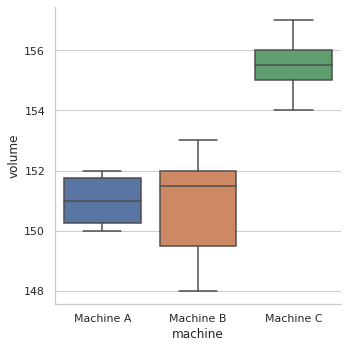

In [61]:
sns.catplot(data=machines_df, x='machine', y='volume', kind='box')

### Goodness of Fit Test (Chi Square)
- To test if the sample is coming from a population with specific distribution.
- Other goodness-of-fit test are :
    - Anderson-Darling
    - Kolmogorov-Smirnov
    
- Null Hypothesis : The data follow a specified distribution
- Alternative Hypothesis : The data do not follow the specified distribution
- **Critical Statistics: Chi square for k-1 degrees of freedom for specific alpha.**

##### Example :
**A coin is flipped 100 times. Number of heads and tails are noted. Is this coin biased? Check with 95% Confidence Level. Observed numbers of Head and tail are 40 and 60 respectively**

In [62]:
# Null hypothesis : Coin is not biased.
# Alternative hypothesis : Coin is biased.
# Alpha : 0.05
expected = [50, 50]
observed = [40, 60]
stats.chisquare(observed, expected)

Power_divergenceResult(statistic=4.0, pvalue=0.04550026389635857)

**p value is less than 0.5 thus reject the null hypothesis.**

## Contigency Tables
- To find relationship between two discrete variables.
- Null Hypothesis : There is no relationship between the row and column variables.
- Alternative Hypothesis : There is a relationship. Alternative hypothesis does not tell what type of relationship exits.

In [63]:
# rows are different shifts and columns are operators
# degrees of freedom will be (row - 1) * (column - 1)
shift_and_operator = np.array([[22, 26, 23], [28, 62, 26], [72, 22, 66]])

In [64]:
chi_square_cal, p_value, degrees_freedom, expected_values = stats.chi2_contingency(shift_and_operator)
print(f"Calculated chi square value : {round(chi_square_cal, 2)}")
print(f"p value : {round(p_value, 2)}")
print(f"Degrees of freedom : {degrees_freedom}")
print(f"Expected value : \n{expected_values}")

Calculated chi square value : 50.09
p value : 0.0
Degrees of freedom : 4
Expected value : 
[[24.96253602 22.50720461 23.53025937]
 [40.78386167 36.77233429 38.44380403]
 [56.25360231 50.7204611  53.0259366 ]]


**p value is less than 0.5 thus reject the null hypothesis.**